**Exercise 4.3** Compute the number of actors in the graph and the average degree of the given actor collaboration data. Plot the PMF of degree on a log-log scale. Also plot the CDF of degree on a log-x scale, to see the general shape of the distribution, and on a log-log scale, to see whether the tail follows a power law.

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate, savefig

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

C:\Users\Carlo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ImportError: cannot import name 'decorate' from 'utils' (C:\Users\Carlo\Documents\Physics 215\Exercise 4\utils.py)

In [6]:
import gzip

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

def read_actor_network(filename, n=None):
    G = nx.Graph()
    with gzip.open(filename) as f:
        for i, line in enumerate(f):
            nodes = [int(x) for x in line.split()]
            G.add_edges_from(all_pairs(nodes))
            if n and i >= n:
                break
    return G

Using these, we then build the actor network graph with a reasonable number for `n` based on the processing load.

In [15]:
actor = read_actor_network('actor.dat.gz', n=10000)

The number of nodes of the actor network is 

In [16]:
len(actor)

17540

We then compute for the average degree and clustering coefficient of the network.

In [22]:
def degrees(G):
    return [G.degree(u) for u in G]

deg = degrees(actor)
print ("Average degree: ", np.mean(deg))
print ("Standard Deviation of degree: ", np.std(deg))

def clustering_coefficient(G):
    def node_clustering(G, u):
        def all_pairs(nodes):
            for i, u in enumerate(nodes):
                for j, v in enumerate(nodes):
                    if i > j:
                        yield u, v
        neighbors = G[u]
        k = len(neighbors)
        if k < 2:
            return np.nan
        possible = k*(k-1)/2
        exist = 0
        for v, w, in all_pairs(neighbors):
            if G.has_edge(v, w):
                exist+=1
        return exist/possible

    cu = [node_clustering(G, node) for node in G]
    return np.nanmean(cu)

print ("Clustering coefficient is: ", clustering_coefficient(actor))

Average degree:  38.35541619156214
Standard Deviation of degree:  61.53610074821354
Clustering coefficient is:  0.7380780556193973


Since the actor network is not connected, we can compute for the average path length using `nx.connected_components` to find the largest subset of connected components.

In [21]:
def sample_path_lengths(G, nodes = None, trials = 1000):
    '''Check if there is a given list of nodes'''
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)
        
    pairs = np.random.choice(nodes, (trials, 2))
    lengths = [nx.shortest_path_length(G, *pair) for pair in pairs]
    return lengths

def estimate_path_length(G, nodes = None, trials = 1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

for nodes in nx.connected_components(actor):
    if len(nodes) > 100:
        print (estimate_path_length(actor,nodes))

3.539


On average, two actors in a connected subset of the network is connected by 3.5 edges.

Text(0, 0.5, 'PMF')

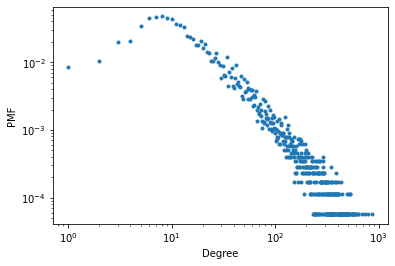

In [23]:
from empiricaldist import Pmf

pmf_actor = Pmf.from_seq(deg)

options = dict(ls='', marker='.')

pmf_actor.plot(label='Actor graph', color='C0', **options)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('PMF')

The tail has a linear trend line for degree greater than around 40 which corroborates with the computed average degree of the actor network. This looks like the distribution follows a power law, however we need to check with the CDF later on to verify.

We then compute for the CDF using `emipirical dist` and plot on a log-x and log-log scale.

Text(0.5, 0, 'Degree')

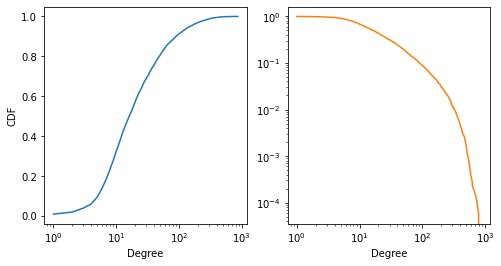

In [25]:
from empiricaldist import Cdf

cdf_actor = Cdf.from_seq(degrees(actor), name = 'Actors')
comp_cdf_actor = 1-cdf_actor

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)

cdf_actor.plot(label='Actor graph', color='C0')
plt.xscale('log')
plt.xlabel('Degree')
plt.ylabel('CDF')

plt.subplot(1,2,2)
comp_cdf_actor.plot(label='Actor graph', color='C1')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree')



The CDF log-x plot shows a typical logarithmic distribution, however the CDF log-log plot does not exhibit a linear behavior that is characteristic of a power law.